## Clean the combined dataset, and push new column(category, new time, and date) into dataframe

In [1]:
import pandas as pd

twitch_API_data = pd.read_json("data/all_combined.json")

In [2]:
twitch_API_data = twitch_API_data.drop(columns=['id', 'user_id','user_login','thumbnail_url','tag_ids','type'])

In [3]:
twitch_API_data["language"].unique()
# twitch_API_data[twitch_API_data["language"]=='zh']

array(['es', 'pt', 'ru', 'en', 'de', 'it', 'tr', 'fr', 'pl', 'ja', 'th',
       'ko', 'zh', 'ar'], dtype=object)

In [4]:
twitch_API_data.isnull().values.any()

False

In [5]:
# twitch_API_data[twitch_API_data["game_name"]=='']
twitch_API_data["game_name"].unique()

array(['League of Legends', 'FIFA 22', 'Dota 2', 'VALORANT', 'Slots',
       'Apex Legends', 'Grand Theft Auto V', 'Rust', 'Just Chatting',
       'Fortnite', 'Jump King', 'Elden Ring', 'Food & Drink',
       'Super Mario Odyssey', 'Street Fighter V', 'Escape from Tarkov',
       'Lost Ark', 'Call of Duty: Warzone', 'PUBG: BATTLEGROUNDS',
       'Sea of Thieves', 'Super Smash Bros. Ultimate', 'Green Hell',
       'Counter-Strike: Global Offensive', 'Virtual Casino', 'SMITE',
       'Trackmania', 'World of Warcraft', 'Minecraft', 'Among Us',
       'Sporcle', 'Brawlhalla', 'Dead by Daylight', 'Vampire Survivors',
       'DayZ', '旅行＆アウトドア', 'Special Events', 'Tale of Immortal',
       'Hearthstone', 'Teamfight Tactics', 'Gartic Phone',
       'Talk Shows & Podcasts', 'Solasta: Crown of the Magister',
       'Diablo III', "No Man's Sky", 'Pools, Hot Tubs, and Beaches',
       'Bloons TD 6', 'Furi', 'Hot Wheels Unleashed', 'Watch Parties',
       "Five Nights at Freddy's: Security Breach",

In [6]:
game = {'League of Legends','FIFA 22','Dota 2', 'VALORANT','Apex Legends', 'Grand Theft Auto V', 'Rust','Fortnite', 'Jump King', 'Elden Ring','Super Mario Odyssey', 'Street Fighter V', 'Escape from Tarkov','Lost Ark', 'Call of Duty: Warzone', 'PUBG: BATTLEGROUNDS',
       'Sea of Thieves', 'Super Smash Bros. Ultimate','Green Hell','Counter-Strike: Global Offensive', 'SMITE','Trackmania', 'World of Warcraft', 'Minecraft', 'Among Us',
       'Sporcle', 'Brawlhalla', 'Dead by Daylight', 'Vampire Survivors','Tale of Immortal','Hearthstone', 'Teamfight Tactics', 'Gartic Phone','DayZ','Solasta: Crown of the Magister',
       'Diablo III', "No Man's Sky",'Bloons TD 6', 'Furi', 'Hot Wheels Unleashed',"Five Nights at Freddy's: Security Breach",'Crimesight', 'World of Tanks', "Demon's Souls",
       "Tom Clancy's Rainbow Six Siege",
       'Atelier Ryza: Ever Darkness & the Secret Hideout',
       'StarCraft: Remastered', 'Doki Doki Literature Club!',
       'Rocket League', 'Jackbox Party Packs', 'Detroit: Become Human',
       'Dungeon Fighter Online', 'Tabletop Simulator','Retro', 'Halo Infinite', 'Ark: Survival Evolved',
       'LEGO Star Wars: The Skywalker Saga','The Long Drive',
       'Heroes of Might and Magic III: The Restoration of Erathia',
       'Shakes and Fidget', 'Quern - Undying Thoughts', 'Dread Hunger',
       'Tropico 6','The Sims 4', 'Cities: Skylines',
       'Factorio', 'For The King', 'The Last of Us','Yu-Gi-Oh! Master Duel', 'Castlevania: Bloodlines',
       'Call of Duty: Vanguard', 'Back 4 Blood', 'Pummel Party',
       'Euro Truck Simulator 2', 'Mario Kart 8 Deluxe',
       'Abriss: build to destroy','Rivals of Aether',
       'Deep Rock Galactic', 'StarCraft II','Backpack Hero',
       'My Summer Car', "I'm Only Sleeping", 'Age of Empires IV',
       'Anno 1800','Squad', 'iRacing',
       "Sid Meier's Civilization VI", 'Forgive Me Father', 'Clash Royale',
       'Maitre des Fleurs', 'Slay the Spire', 'Deadness', 'Stronghold 2',
       'Perfect Heist 2', "Who's Lila?",'Animal Revolt Battle Simulator', 'MapleStory', 'Planet Coaster',
       'Shieldwall', 'Pro Soccer Online', 'F1 2021',
       'Mario + Rabbids Kingdom Battle'}
entertainment = {'Slots','Just Chatting','Food & Drink', 'Virtual Casino','旅行＆アウトドア','Talk Shows & Podcasts','Pools, Hot Tubs, and Beaches','Politics','Music','Sports','Chess','Wordle','GeoGuessr','Travel & Outdoors'}
other = {'Special Events','Watch Parties',''}

In [7]:
for idx, row in twitch_API_data.iterrows():
    if  twitch_API_data.loc[idx,'game_name'] in game :
        twitch_API_data.loc[idx,'category'] = 'Game'
    elif twitch_API_data.loc[idx,'game_name'] in entertainment:
        twitch_API_data.loc[idx,'category'] = 'Entertainment'
    elif twitch_API_data.loc[idx,'game_name'] in other:
        twitch_API_data.loc[idx,'category'] = 'Other'

In [8]:
twitch_API_data['category'].unique()
# twitch_API_data[twitch_API_data['category'].isna()]

array(['Game', 'Entertainment', 'Other'], dtype=object)

In [9]:
twitch_API_data.iloc[[0]]

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category
0,Nissaxter,21779,League of Legends,🔴FUMIGANDO LA GRIETA DEL INVOCADOR DE YUMMY PL...,5310,2022-04-15 21:29:17+00:00,es,True,Game


In [10]:
twitch_API_data['started_at'] = twitch_API_data['started_at'].dt.tz_convert('US/Central')

In [11]:
twitch_API_data.iloc[[0]]

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category
0,Nissaxter,21779,League of Legends,🔴FUMIGANDO LA GRIETA DEL INVOCADOR DE YUMMY PL...,5310,2022-04-15 16:29:17-05:00,es,True,Game


In [12]:
for idx, row in twitch_API_data.iterrows():
    timestamp = str(twitch_API_data.loc[idx,'started_at'])
    date, time = timestamp.split()
    time = time[0:8]
    twitch_API_data.loc[idx,'date'] = date
    twitch_API_data.loc[idx,'time'] = time

In [13]:
twitch_API_data.head()

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
0,Nissaxter,21779,League of Legends,🔴FUMIGANDO LA GRIETA DEL INVOCADOR DE YUMMY PL...,5310,2022-04-15 16:29:17-05:00,es,True,Game,2022-04-15,16:29:17
1,adolfz,1869092879,FIFA 22,Banqueta vs Brit1909 -2 rodada liga dos Stream...,5448,2022-04-15 12:44:51-05:00,pt,True,Game,2022-04-15,12:44:51
2,ybicanoooobov,29595,Dota 2,"Пятничные зарубы с Федерико, заходи братишка!",5505,2022-04-15 13:31:30-05:00,ru,False,Game,2022-04-15,13:31:30
3,Nadeshot,516575,VALORANT,Ranked Valorant,5506,2022-04-15 11:19:22-05:00,en,True,Game,2022-04-15,11:19:22
4,stevewillsendit,498566,Slots,80k RAW BALANCE STEVEWILLDOIT !discord,5620,2022-04-15 16:31:44-05:00,en,True,Entertainment,2022-04-15,16:31:44


## Explore basic demographic of the dataset

In [14]:
import matplotlib.pyplot as plt

In [15]:
twitch_demo = twitch_API_data.drop_duplicates('user_name')
len(twitch_demo)

417

In [16]:
twitch_grouped_category = twitch_demo.groupby('category').size()
# twitch_grouped_category

<AxesSubplot:xlabel='category'>

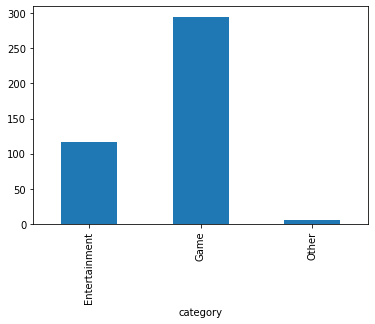

In [17]:
twitch_grouped_category.plot(kind='bar')

<AxesSubplot:xlabel='language'>

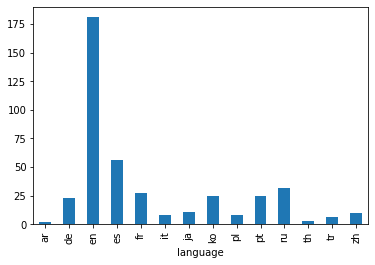

In [18]:
twitch_grouped_language = twitch_demo.groupby('language').size()
twitch_grouped_language.plot(kind='bar')

## Part 1 Language and mature content

In [19]:
twitch_sorted_viewer = twitch_API_data.sort_values(by=['viewer_count'],ascending=False)
# twitch_sorted_viewer

In [20]:
twitch_sorted_viewer = twitch_sorted_viewer[['user_name','game_name','viewer_count','time','language','is_mature','category']].drop_duplicates('user_name')
twitch_sorted_viewer

,user_name,game_name,viewer_count,time,language,is_mature,category
460,auronplay,Grand Theft Auto V,215434,12:40:56,es,False,Game
310,xQcOW,Rust,112096,15:34:21,en,False,Game
304,LCS,League of Legends,101015,14:00:44,en,False,Game
645,PGL,Counter-Strike: Global Offensive,90737,03:33:17,en,False,Game
597,loud_coringa,Grand Theft Auto V,89721,18:04:40,pt,False,Game
...,...,...,...,...,...,...,...
740,pizfn,Fortnite,3931,06:54:34,it,False,Game
741,MuTeX,Call of Duty: Warzone,3916,03:26:19,en,True,Game
742,uhSnow,Grand Theft Auto V,3913,06:57:13,en,True,Game
743,Mr__Gibbins,Elden Ring,3896,06:59:10,en,False,Game


In [21]:
twitch_lan_and_mature = twitch_sorted_viewer[['language','is_mature']]

In [22]:
twitch_lan_and_mature_grouped = twitch_lan_and_mature.groupby('language').is_mature.value_counts()

twitch_lan_and_mature_grouped

language  is_mature
ar        False          2
de        False         15
          True           8
en        False        132
          True          49
es        False         52
          True           4
fr        False         22
          True           5
it        False          8
ja        False         11
ko        False         23
          True           2
pl        False          8
pt        False         13
          True          12
ru        False         26
          True           6
th        False          3
tr        False          3
          True           3
zh        True           6
          False          4
Name: is_mature, dtype: int64

<AxesSubplot:xlabel='language,is_mature'>

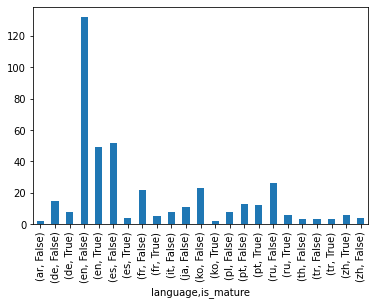

In [23]:
twitch_lan_and_mature_grouped.plot.bar()

In [24]:
len(twitch_lan_and_mature[twitch_lan_and_mature['language']=='en'])

181

In [25]:
len(twitch_lan_and_mature[twitch_lan_and_mature['language']=='ru'])


32

## Part 2 Mature content and viewer count

In [26]:
twitch_mature_viewer =  twitch_sorted_viewer[['language','viewer_count','is_mature']]
twitch_mature_viewer

,language,viewer_count,is_mature
460,es,215434,False
310,en,112096,False
304,en,101015,False
645,en,90737,False
597,pt,89721,False
...,...,...,...
740,it,3931,False
741,en,3916,True
742,en,3913,True
743,en,3896,False


In [29]:
twitch_mature_viewer_grouped_mean = twitch_mature_viewer.groupby(['language','is_mature']).mean()
twitch_mature_viewer_grouped_mean

viewer_count
language is_mature              
ar       False      12000.000000
de       False      14276.600000
         True       13987.000000
en       False      19301.712121
         True       12296.224490
es       False      21387.269231
         True       12480.000000
fr       False      20013.000000
         True       11021.000000
it       False      13501.000000
ja       False      21573.363636
ko       False       9541.608696
         True        7867.000000
pl       False       8490.375000
pt       False      22401.538462
         True       21315.000000
ru       False      13855.884615
         True        6470.500000
th       False      18388.666667
tr       False      11347.333333
         True       24062.000000
zh       False       6673.250000
         True        5547.166667

In [30]:
twitch_mature_viewer_grouped_sum = twitch_mature_viewer.groupby(['language','is_mature']).sum()
twitch_mature_viewer_grouped_sum

viewer_count
language is_mature              
ar       False             24000
de       False            214149
         True             111896
en       False           2547826
         True             602515
es       False           1112138
         True              49920
fr       False            440286
         True              55105
it       False            108008
ja       False            237307
ko       False            219457
         True              15734
pl       False             67923
pt       False            291220
         True             255780
ru       False            360253
         True              38823
th       False             55166
tr       False             34042
         True              72186
zh       False             26693
         True              33283

## part3 streaming time

In [30]:
twitch_time = twitch_API_data.copy()

In [31]:
twitch_time_day = twitch_time.copy()
for idx, row in twitch_time_day.iterrows():
    timestamp = twitch_time_day.loc[idx,'time']
    hour, minute, second = timestamp.split(':')
    if(int(hour) > 11):
        twitch_time_day.drop(index = idx, inplace=True)
twitch_time_day

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
3,Nadeshot,516575,VALORANT,Ranked Valorant,5506,2022-04-15 11:19:22-05:00,en,True,Game,2022-04-15,11:19:22
16,AverageJonas,516575,VALORANT,RANKED w/ Flights,9156,2022-04-15 09:06:12-05:00,en,False,Game,2022-04-15,09:06:12
20,WestCOL,509658,Just Chatting,12 HORAS!!! HACE MUCHO NO HAGO ESTO,7931,2022-04-15 11:54:44-05:00,es,False,Entertainment,2022-04-15,11:54:44
23,Carola,263490,Rust,[DROPS] TWITCH RIVALS RUST - LATAM/ES VS EEUU....,6520,2022-04-15 10:11:31-05:00,es,False,Game,2022-04-15,10:11:31
25,MckyTV,509658,Just Chatting,LATE NIGHT,6584,2022-04-15 11:53:38-05:00,de,False,Entertainment,2022-04-15,11:53:38
...,...,...,...,...,...,...,...,...,...,...,...
740,pizfn,33214,Fortnite,ME Duo Cash CUP !chat | !newvid !S22 !M8,3931,2022-04-18 06:54:34-05:00,it,False,Game,2022-04-18,06:54:34
741,MuTeX,512710,Call of Duty: Warzone,$400 POT 2v2 WAGERS | !newvid !newtik !subday,3916,2022-04-18 03:26:19-05:00,en,True,Game,2022-04-18,03:26:19
742,uhSnow,32982,Grand Theft Auto V,Trooper Snow | NoPixel | discord.gg/Snow,3913,2022-04-18 06:57:13-05:00,en,True,Game,2022-04-18,06:57:13
743,Mr__Gibbins,512953,Elden Ring,CHRONICLES OF BRENDA THE SAD - SORCERY !sneak ...,3896,2022-04-18 06:59:10-05:00,en,False,Game,2022-04-18,06:59:10


In [32]:
twitch_time_day = twitch_time_day.drop_duplicates('user_name')

In [33]:
len(twitch_time_day[twitch_time_day['language']=='en'])

105

In [34]:
len(twitch_time_day[twitch_time_day['language']=='es'])

36

In [35]:
twitch_time_day_sorted = twitch_time_day.sort_values(by=['viewer_count'],ascending=False)
twitch_time_day_sorted

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
309,auronplay,32982,Grand Theft Auto V,Último dia de carreritas oye hacker si lees es...,149921,2022-04-16 09:46:30-05:00,es,False,Game,2022-04-16,09:46:30
114,ibai,32982,Grand Theft Auto V,CARRERAS DE GTA EN MITAD DE SEMANA SANTA A VER...,82098,2022-04-15 09:59:39-05:00,es,False,Game,2022-04-15,09:59:39
121,otplol_,21779,League of Legends,EUM GROUP STAGE - JOUR 2 - BO1,79708,2022-04-15 09:00:26-05:00,fr,False,Game,2022-04-15,09:00:26
112,Gaules,32399,Counter-Strike: Global Offensive,Pain vs 9z PGL Major Antwerp 2022 Americas RMR...,71814,2022-04-15 03:53:22-05:00,pt,True,Game,2022-04-15,03:53:22
123,Alexby11,263490,Rust,DROP EXCLUSIVO! Twitch Rivals 100K$ NA vs Es/L...,68876,2022-04-15 10:12:30-05:00,es,False,Game,2022-04-15,10:12:30
...,...,...,...,...,...,...,...,...,...,...,...
740,pizfn,33214,Fortnite,ME Duo Cash CUP !chat | !newvid !S22 !M8,3931,2022-04-18 06:54:34-05:00,it,False,Game,2022-04-18,06:54:34
741,MuTeX,512710,Call of Duty: Warzone,$400 POT 2v2 WAGERS | !newvid !newtik !subday,3916,2022-04-18 03:26:19-05:00,en,True,Game,2022-04-18,03:26:19
742,uhSnow,32982,Grand Theft Auto V,Trooper Snow | NoPixel | discord.gg/Snow,3913,2022-04-18 06:57:13-05:00,en,True,Game,2022-04-18,06:57:13
743,Mr__Gibbins,512953,Elden Ring,CHRONICLES OF BRENDA THE SAD - SORCERY !sneak ...,3896,2022-04-18 06:59:10-05:00,en,False,Game,2022-04-18,06:59:10


In [36]:
twitch_time_day_grouped = twitch_time_day[['language','viewer_count']].groupby('language').mean()
twitch_time_day_grouped

,viewer_count
language,
de,13691.272727
en,13061.314286
es,18817.361111
fr,15837.187500
it,3931.000000
ja,18076.900000
ko,8551.250000
pl,8412.750000
pt,18494.461538


In [37]:
twitch_time_day_language = twitch_time_day[['language','viewer_count']].groupby('language').count()
twitch_time_day_language

,viewer_count
language,
de,22
en,105
es,36
fr,16
it,1
ja,10
ko,24
pl,8
pt,13


In [45]:
twitch_time_night = twitch_time.copy()
for idx, row in twitch_time_night.iterrows():
    timestamp = twitch_time_night.loc[idx,'time']
    hour, minute, second = timestamp.split(':')
    if(int(hour) < 12):
        twitch_time_night.drop(index = idx, inplace=True)
twitch_time_night

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
0,Nissaxter,21779,League of Legends,🔴FUMIGANDO LA GRIETA DEL INVOCADOR DE YUMMY PL...,5310,2022-04-15 16:29:17-05:00,es,True,Game,2022-04-15,16:29:17
1,adolfz,1869092879,FIFA 22,Banqueta vs Brit1909 -2 rodada liga dos Stream...,5448,2022-04-15 12:44:51-05:00,pt,True,Game,2022-04-15,12:44:51
2,ybicanoooobov,29595,Dota 2,"Пятничные зарубы с Федерико, заходи братишка!",5505,2022-04-15 13:31:30-05:00,ru,False,Game,2022-04-15,13:31:30
4,stevewillsendit,498566,Slots,80k RAW BALANCE STEVEWILLDOIT !discord,5620,2022-04-15 16:31:44-05:00,en,True,Entertainment,2022-04-15,16:31:44
5,stevewillsendit,498566,Slots,80k RAW BALANCE STEVEWILLDOIT !discord,5620,2022-04-15 16:31:44-05:00,en,True,Entertainment,2022-04-15,16:31:44
...,...,...,...,...,...,...,...,...,...,...,...
642,Gotaga,509658,Just Chatting,Soirée OPENWORLD avec AMINE & ETOILES !,38076,2022-04-18 12:47:50-05:00,fr,False,Entertainment,2022-04-18,12:47:50
643,juansguarnizo,32982,Grand Theft Auto V,LONDON EYE #1 / Piloto (1pm MX),63259,2022-04-18 12:28:58-05:00,es,False,Game,2022-04-18,12:28:58
656,Shlorox,861606109,Deadness,OSTEREVENT | Eventlocation,16782,2022-04-17 23:47:37-05:00,de,False,Game,2022-04-17,23:47:37
730,Saintone,490100,Lost Ark,Raising Megaman | Read: !faq !guide,4216,2022-04-17 21:05:44-05:00,en,False,Game,2022-04-17,21:05:44


In [46]:
twitch_time_night = twitch_time_night.drop_duplicates('user_name')

In [47]:
len(twitch_time_night[twitch_time_night['language']=='en'])

94

In [48]:
len(twitch_time_night[twitch_time_night['language']=='es'])

31

In [49]:
twitch_time_night_sorted = twitch_time_night.sort_values(by=['viewer_count'],ascending=False)
twitch_time_night_sorted

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
460,auronplay,32982,Grand Theft Auto V,Londres Eye #1 - GTA V ROLEPLAY,215434,2022-04-17 12:40:56-05:00,es,False,Game,2022-04-17,12:40:56
52,xQcOW,263490,Rust,📢MEGA DROPS📢#1 NA TEAM LEADER📢$100K WINNER📢RUS...,85244,2022-04-15 15:34:21-05:00,en,False,Game,2022-04-15,15:34:21
113,hJune,263490,Rust,[DROPS + SUBATHON] NA's last hope !rivals !you...,76620,2022-04-14 13:09:27-05:00,en,True,Game,2022-04-14,13:09:27
643,juansguarnizo,32982,Grand Theft Auto V,LONDON EYE #1 / Piloto (1pm MX),63259,2022-04-18 12:28:58-05:00,es,False,Game,2022-04-18,12:28:58
78,DisguisedToast,263490,Rust,"[MP5 Skin Drops] Twig Rivals - Day 2 - $100,00...",51436,2022-04-15 13:56:14-05:00,en,False,Game,2022-04-15,13:56:14
...,...,...,...,...,...,...,...,...,...,...,...
236,LevelNextGG,30921,Rocket League,LevelNext Rocket League Spring Showcase Group ...,5227,2022-04-16 16:50:16-05:00,en,False,Game,2022-04-16,16:50:16
215,tarzaned,21779,League of Legends,RANK 1 CLIMB !korea | SUB FOR TIER LISTS/SEMIN...,5176,2022-04-16 16:50:15-05:00,en,True,Game,2022-04-16,16:50:15
558,Shylily,509658,Just Chatting,🦐 LEWD ORCA UNTIL DAWN HORROR NIGHT GAMEPLAY! ...,5011,2022-04-17 12:10:47-05:00,en,True,Entertainment,2022-04-17,12:10:47
559,wudijo,313558,Diablo III,5% drop rate guys - !EN !raekor !marauder !Tie...,4994,2022-04-16 22:23:15-05:00,en,False,Game,2022-04-16,22:23:15


In [50]:
twitch_time_night_grouped = twitch_time_night[['language','viewer_count']].groupby('language').mean()
twitch_time_night_grouped

,viewer_count
language,
ar,12000.000000
de,14145.571429
en,15311.202128
es,23178.000000
fr,15264.937500
it,13563.428571
ja,23309.000000
ko,12243.000000
pl,15879.000000


In [51]:
twitch_time_night_language = twitch_time_night[['language','viewer_count']].groupby('language').count()
twitch_time_night_language

,viewer_count
language,
ar,2
de,7
en,94
es,31
fr,16
it,7
ja,1
ko,1
pl,1


Realize the above analysis has flaws, so look at overall viewer count

In [74]:
overall_viewer_twitch = twitch_API_data.copy()
overall_viewer_twitch

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
0,Nissaxter,21779,League of Legends,🔴FUMIGANDO LA GRIETA DEL INVOCADOR DE YUMMY PL...,5310,2022-04-15 16:29:17-05:00,es,True,Game,2022-04-15,16:29:17
1,adolfz,1869092879,FIFA 22,Banqueta vs Brit1909 -2 rodada liga dos Stream...,5448,2022-04-15 12:44:51-05:00,pt,True,Game,2022-04-15,12:44:51
2,ybicanoooobov,29595,Dota 2,"Пятничные зарубы с Федерико, заходи братишка!",5505,2022-04-15 13:31:30-05:00,ru,False,Game,2022-04-15,13:31:30
3,Nadeshot,516575,VALORANT,Ranked Valorant,5506,2022-04-15 11:19:22-05:00,en,True,Game,2022-04-15,11:19:22
4,stevewillsendit,498566,Slots,80k RAW BALANCE STEVEWILLDOIT !discord,5620,2022-04-15 16:31:44-05:00,en,True,Entertainment,2022-04-15,16:31:44
...,...,...,...,...,...,...,...,...,...,...,...
740,pizfn,33214,Fortnite,ME Duo Cash CUP !chat | !newvid !S22 !M8,3931,2022-04-18 06:54:34-05:00,it,False,Game,2022-04-18,06:54:34
741,MuTeX,512710,Call of Duty: Warzone,$400 POT 2v2 WAGERS | !newvid !newtik !subday,3916,2022-04-18 03:26:19-05:00,en,True,Game,2022-04-18,03:26:19
742,uhSnow,32982,Grand Theft Auto V,Trooper Snow | NoPixel | discord.gg/Snow,3913,2022-04-18 06:57:13-05:00,en,True,Game,2022-04-18,06:57:13
743,Mr__Gibbins,512953,Elden Ring,CHRONICLES OF BRENDA THE SAD - SORCERY !sneak ...,3896,2022-04-18 06:59:10-05:00,en,False,Game,2022-04-18,06:59:10


In [86]:
overall_viewer_jap = overall_viewer_twitch[overall_viewer_twitch['language']=='ja']
overall_viewer_jap[['user_name','viewer_count']].groupby(by=['user_name']).sum()

,viewer_count
user_name,
Jasper7se,39451
SPYGEA,5578
chihiro2434,4889
fps_shaka,149391
k4sen,23309
stylishnoob4,84757
valorant_jpn,82416
ありさか,11744
さくらみこ,6931


In [87]:
overall_viewer_en = overall_viewer_twitch[overall_viewer_twitch['language']=='en']
overall_viewer_en[['user_name','viewer_count']].groupby(by=['user_name']).sum()

,viewer_count
user_name,
39daph,6801
ATT,13485
AdinRoss,37576
AdmiralBahroo,5770
AdmiralBulldog,4453
...,...
uhSnow,3913
veibae,46515
wudijo,40459


In [88]:
overall_viewer_twitch[overall_viewer_twitch['user_name']=='fps_shaka']

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
120,fps_shaka,516575,VALORANT,カスタム＠2,31384,2022-04-15 06:23:29-05:00,ja,False,Game,2022-04-15,06:23:29
326,fps_shaka,516575,VALORANT,"キャスタム｜!member, !multi",40559,2022-04-16 06:31:29-05:00,ja,False,Game,2022-04-16,06:31:29
466,fps_shaka,516575,VALORANT,VCT,33088,2022-04-17 09:43:49-05:00,ja,False,Game,2022-04-17,09:43:49
651,fps_shaka,516575,VALORANT,hai,44360,2022-04-18 05:35:30-05:00,ja,False,Game,2022-04-18,05:35:30


In [90]:
overall_viewer_twitch[overall_viewer_twitch['user_name']=='ありさか']

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
90,ありさか,511224,Apex Legends,ape,6629,2022-04-15 11:37:43-05:00,ja,False,Game,2022-04-15,11:37:43
400,ありさか,516575,VALORANT,バロカスタム,5115,2022-04-16 06:53:54-05:00,ja,False,Game,2022-04-16,06:53:54


In [89]:
overall_viewer_twitch[overall_viewer_twitch['user_name']=='xQcOW']

,user_name,game_id,game_name,title,viewer_count,started_at,language,is_mature,category,date,time
52,xQcOW,263490,Rust,📢MEGA DROPS📢#1 NA TEAM LEADER📢$100K WINNER📢RUS...,85244,2022-04-15 15:34:21-05:00,en,False,Game,2022-04-15,15:34:21
310,xQcOW,263490,Rust,📢MEGA DROPS📢#1 NA TEAM LEADER📢$100K WINNER📢RUS...,112096,2022-04-15 15:34:21-05:00,en,False,Game,2022-04-15,15:34:21
436,xQcOW,509658,Just Chatting,☢️BIG DRAMA☢️CLICK NOW☢️OMG! I CANT BELIEVE IT...,71765,2022-04-17 18:53:18-05:00,en,False,Entertainment,2022-04-17,18:53:18
596,xQcOW,509658,Just Chatting,🟨CLICK HERE NOW🟨 󠀀BIG NEWS🟨 󠀀INSANE CONTENT🟨 󠀀...,80903,2022-04-18 18:27:52-05:00,en,False,Entertainment,2022-04-18,18:27:52
